In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
spine = pd.read_csv('spine.csv')

## Scaling Your Data

In [29]:
scaler = StandardScaler()
scaler.fit(spine.drop('pain', axis=1))
scaledVariables = scaler.transform(spine.drop('pain',axis=1))
spineScaled = pd.DataFrame(scaledVariables, columns=spine.columns[:-1])

In [5]:
spineScaled.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0.951630,-1.015066,0.434293,1.167129,-1.196587,1.712368
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,-0.202553,-0.977816,1.316291,1.679551,-0.940325,-0.913941
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0.006694,0.639127,1.302680,1.635969,-1.227178,-0.615686
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,-0.363213,0.259554,-0.105211,-0.176157,-1.345020,-0.652989
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0.246670,1.643094,0.851472,-1.059666,-0.190502,-0.069858


## Subsetting Your Data

In [30]:
x = spineScaled
y = spine['pain']

## Train, Test, Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

## KNN Analysis

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [33]:
pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0])

## Confusion Matrix

In [34]:
print(confusion_matrix(y_test, pred))

[[51 11]
 [10 21]]


#### 51 correct Abnormal predictions, 10 incorrect
#### 21 correct Normal predictions, 11 incorrect

## Classification Report

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        62
           1       0.66      0.68      0.67        31

    accuracy                           0.77        93
   macro avg       0.75      0.75      0.75        93
weighted avg       0.78      0.77      0.78        93



#### 84% Accuracy in Predicting Abnormal (Pain)
#### 66% Accuracy in Predicting Normal (No Pain)

## Can We Get the Accuracy Level Higher?

In [36]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

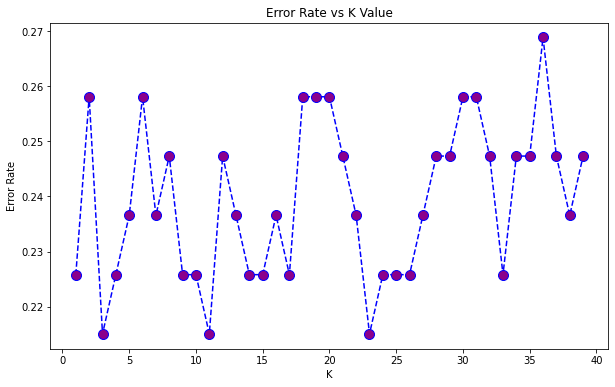

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='darkmagenta', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### 4, 11, and 24 are the lowest with closest to no error

## Run the Final Model with Different # of Neighbors

### 11 Neighbors

In [38]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [39]:
print(confusion_matrix(y_test, pred))

[[50 12]
 [ 8 23]]


#### 50 correct Abnormal predictions, 8 incorrect
#### 23 correct Normal predictions, 12 incorrect

In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        62
           1       0.66      0.74      0.70        31

    accuracy                           0.78        93
   macro avg       0.76      0.77      0.77        93
weighted avg       0.79      0.78      0.79        93



#### Abnormal prediction improved by .02 compared to initial
#### Normal prediction stayed the same

### 4 Neighbors

In [41]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [42]:
print(confusion_matrix(y_test, pred))

[[54  8]
 [13 18]]


#### 54 correct Abnormal predictions, 13 incorrect
#### 18 correct Normal predictions, 8 incorrect

In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        62
           1       0.69      0.58      0.63        31

    accuracy                           0.77        93
   macro avg       0.75      0.73      0.73        93
weighted avg       0.77      0.77      0.77        93



#### Abnormal prediction decreased by .03 compared to initial model
#### Normal prediction improved by .03 compared to initial model

### 24 Neighbors

In [47]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [48]:
print(confusion_matrix(y_test, pred))

[[53  9]
 [12 19]]


#### 53 correct Abnormal predictions, 12 incorrect
#### 19 correct Normal predictions, 9 incorrect

In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        62
           1       0.68      0.61      0.64        31

    accuracy                           0.77        93
   macro avg       0.75      0.73      0.74        93
weighted avg       0.77      0.77      0.77        93



#### Abnormal prediction decreased by .02 compared to initial model
#### Normal prediction improved by .02 compared to initial model

# Conclusion

## 11 Neighbors makes for the best model:
### 86% Accurate for Abnormal Prediction
### 66% Accurate for Normal Prediction